<a href="https://colab.research.google.com/github/Aleksandr62aa/Automatic-Number_Plate_Recognition/blob/main/Number_plate_recognition_YOLOv8_easyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Automatic number plate recognition**

**YOLOv8 + Easyocr**

**Algorithm:**

1.Search for a number plate

2.Normalizing numbers plate

3.Recognising text for a number plate

In [2]:
# Setup YOLO
!pip install ultralytics
from ultralytics import YOLO
import ultralytics
ultralytics.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.0/646.0 kB 5.9 MB/s eta 0:00:00


'8.0.220'

In [3]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 33.1 MB/s eta 0:00:00


In [4]:
!git clone https://github.com/Aleksandr62aa/Automatic-Number_Plate_Recognition.git
%cd Automatic-Number_Plate_Recognition

Cloning into 'Automatic-Number_Plate_Recognition'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 76 (delta 21), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (76/76), 8.38 MiB | 9.82 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/Automatic-Number_Plate_Recognition


In [5]:
# Importing libraries
import matplotlib.pyplot as plt
import cv2
import easyocr

In [20]:
# load a image
car_path = '/content/car2.jpg'
carplate_img = cv2.imread(car_path)
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)

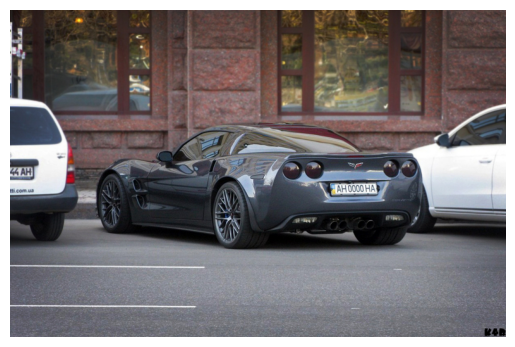

In [21]:
def show_img(img, cmap = None, axis = False):
    plt.imshow(img, cmap=cmap)
    plt.axis(axis)
    plt.show()

show_img(carplate_img_rgb)

**1.Search for a number plate**

In [22]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('/content/Automatic-Number_Plate_Recognition/ultralytics/train_model/weights/best.pt')

# Run predict model
results = model.predict(car_path, save=True, imgsz=320, conf=0.2)


image 1/1 /content/car2.jpg: 224x320 2 licences, 87.3ms
Speed: 1.8ms preprocess, 87.3ms inference, 4.2ms postprocess per image at shape (1, 3, 224, 320)
Results saved to runs/detect/predict2


In [23]:
result = results[0]
box =result.boxes[0]
cords = box.xyxy[0].tolist()
# cords = [int(x) for x in cords]
cords[0], cords[1], cords[2], cords[3] = int(cords[0]), int(cords[1]), int(cords[2] - cords[0]), int(cords[3] - cords[1])

**2.Normalizing numbers plate**

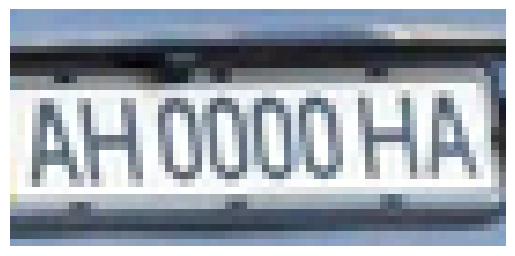

In [24]:
def carplate_extract(image, cords):
    x,y,w,h = cords
    carplate_img = image[y:y+h,x+14:x+w-7]
    return carplate_img

carplate_extract_img = carplate_extract(carplate_img_rgb, cords)
show_img(carplate_extract_img)

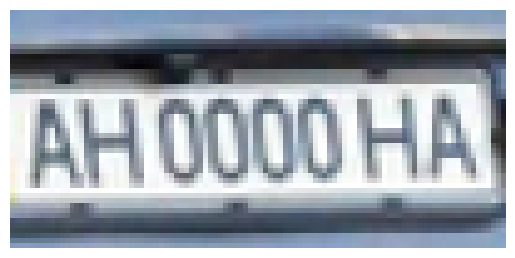

In [25]:
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] *scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

carplate_extract_img = enlarge_img(carplate_extract_img, 150)
show_img(carplate_extract_img)

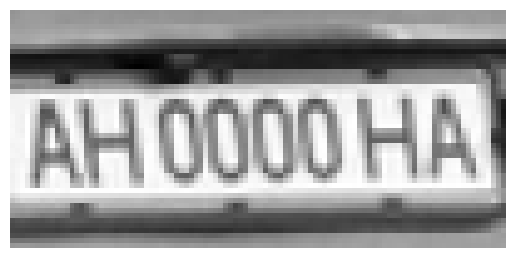

In [26]:
carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
show_img(carplate_extract_img_gray, cmap = 'gray')

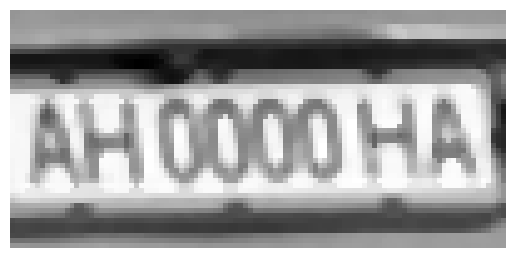

In [27]:
carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3)
show_img(carplate_extract_img_gray_blur, cmap = 'gray')

**3.Recognising text for a number plate**

In [28]:
reader=easyocr.Reader(['en'])
result=reader.readtext(carplate_extract_img_gray)
carplate_text = ""
for res in result:
    if len(result) == 1 or (len(res[1]) > 6 and res[2] > 0.2):
        carplate_text = res[1]
        carplate_text = str(carplate_text).rstrip()

print(carplate_text, sep = '\n')

AHOOOOHA


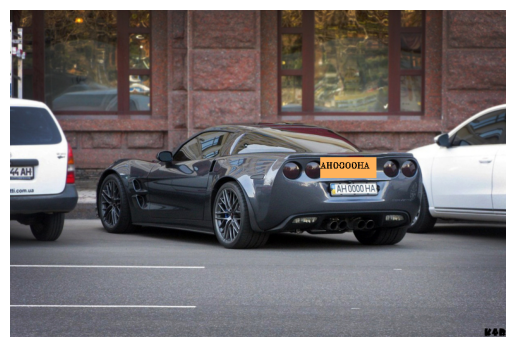

In [29]:
x,y,w,h = cords
k = w / 180
cv2.rectangle(carplate_img_rgb, (x-10,y-h), (x+w-10,y), (255, 178, 90), -1)
cv2.putText(carplate_img_rgb,carplate_text, (x-10, y-15), cv2.FONT_HERSHEY_TRIPLEX, 0.9*k, (0, 0, 0), 1)
show_img(carplate_img_rgb)

In [30]:
filename = 'car_YOLOv8_easyOCR.jpg'
carplate_img_bgr = cv2.cvtColor(carplate_img_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite(filename, carplate_img_bgr)

True